## Import libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix

Using TensorFlow backend.


## Import datasets

In [2]:
train_data= '../Project 3/chest_xray/chest_xray/train/'
train_normal='../Project 3/chest_xray/chest_xray/train/NORMAL/'
train_pneumonia='../Project 3/chest_xray/chest_xray/train/PNEUMONIA/'
val_data = '../Project 3/chest_xray/chest_xray/val/'
test_data = '../Project 3/chest_xray/chest_xray/test/'

## Data visualisation

1341
normal picture file name  NORMAL2-IM-1187-0001.jpeg
pneumonia picture filename: person471_virus_967.jpeg


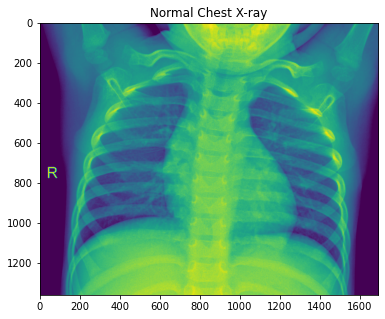

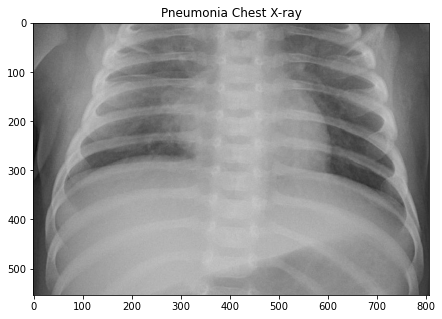

In [3]:
#Normal chest picture
print(len(os.listdir(train_normal)))
random_norm= np.random.randint(0,len(os.listdir(train_normal)))
normal_chest_pic = os.listdir(train_normal)[random_norm]
normal_chest_pic_location = train_normal+normal_chest_pic

#Pneumonia infected chest picture
random_pneumonia = np.random.randint(0,len(os.listdir(train_pneumonia)))

pneumonia_chest_pic =  os.listdir(train_pneumonia)[random_pneumonia]
pneumonia_chest_pic_location = train_pneumonia+pneumonia_chest_pic


# Load the images
normal_image = Image.open(normal_chest_pic_location)
pneumonia_image = Image.open(pneumonia_chest_pic_location)

plt.figure(figsize= (10,5))
plt.imshow(normal_image)
plt.title('Normal Chest X-ray')
print('normal picture file name ',normal_chest_pic)

plt.figure(figsize= (10,5))
plt.imshow(pneumonia_image)
plt.title('Pneumonia Chest X-ray')
print('pneumonia picture filename:', pneumonia_chest_pic)

## Built the CNN model using the train set images

In [4]:
# let's build the CNN model

cnn = Sequential()

# 1st Convolution layer
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

# 1st Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 3rd Convolution layer
#cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 3rd Pooling layer
#cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Connect all the Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])







## Train the CNN model using train set

In [5]:

train_data_gen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.5,
                                   zoom_range = 0.5,
                                   horizontal_flip = True)

test_data_gen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_data_gen.flow_from_directory(train_data,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = test_data_gen.flow_from_directory(val_data,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_data_gen.flow_from_directory(test_data,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')



Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               802944    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [7]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 3,
                         validation_data = validation_generator,
                         validation_steps = 624)

Epoch 1/3
200/200 [==============================] - 205s 1s/step - loss: 0.4499 - accuracy: 0.8006 - val_loss: 0.6413 - val_accuracy: 0.6250
Epoch 2/3
200/200 [==============================] - 202s 1s/step - loss: 0.3295 - accuracy: 0.8648 - val_loss: 0.6448 - val_accuracy: 0.6250
Epoch 3/3
200/200 [==============================] - 200s 1s/step - loss: 0.2890 - accuracy: 0.8788 - val_loss: 0.5016 - val_accuracy: 0.6875


In [8]:
test_accuracy = cnn.evaluate_generator(test_set,steps=624)


In [9]:
print(test_accuracy)
print('The testing accuracy is :',test_accuracy[1]*100, '%')

[0.25052890181541443, 0.860723078250885]
The testing accuracy is : 86.0723078250885 %


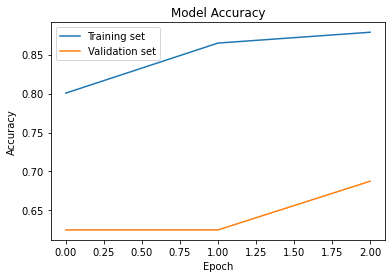

In [10]:
# Accuracy 

plt.plot(cnn_model.history['accuracy'])
plt.plot(cnn_model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()


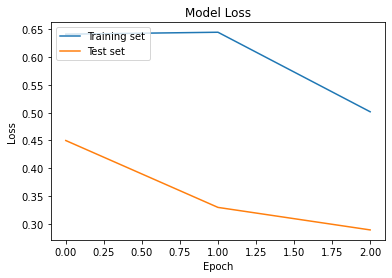

In [11]:
# Loss 

plt.plot(cnn_model.history['val_loss'])
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()